# Creating a model that will help to  predict if a person has a high probablity of paying the Loan back

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\dhanu\dtprojdata.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dhanu\AppData\Local\Temp\ipykernel_24212\2309939162.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('C:\\Users\\dhanu\dtprojdata.csv')


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

**EDA**

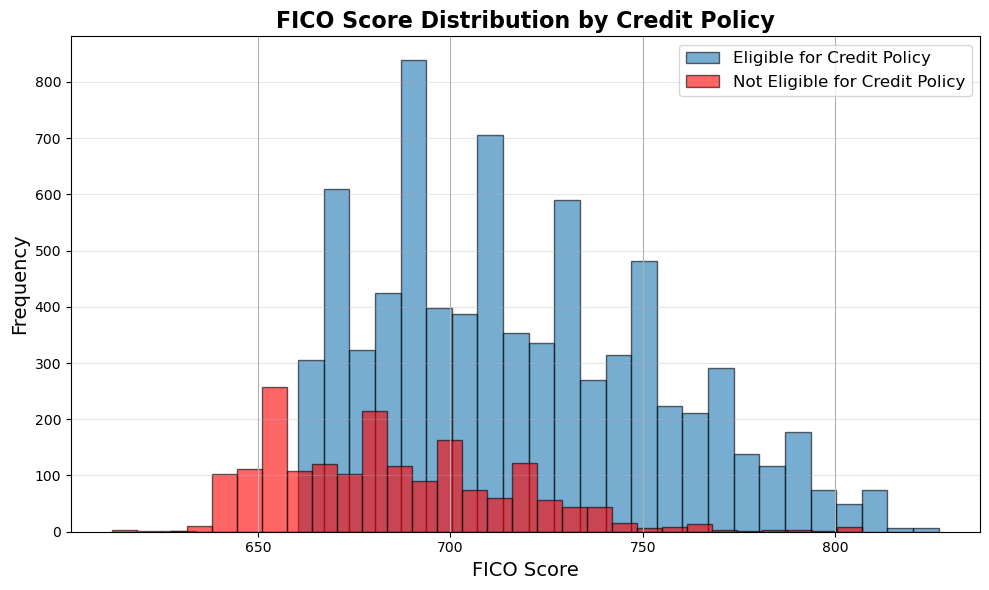

In [42]:
plt.figure(figsize=(10, 6)) 

df[df['credit.policy']==1]['fico'].hist(bins= 30, alpha = 0.6, label = 'Eligible for Credit Policy',ec='black')
df[df['credit.policy']==0]['fico'].hist(bins=30,alpha=0.6,label = 'Not Eligible for Credit Policy',ec='black',color='red')

plt.title('FICO Score Distribution by Credit Policy', fontsize=16, fontweight='bold')
plt.xlabel('FICO Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout() 


plt.show()


# Findings: Eligibility and FICO Score Analysis

### 1. **Eligibility and FICO Score**
- The graph indicates that individuals with **higher FICO scores** are more likely to be eligible for the credit policy.
  - The majority of eligible individuals have FICO scores **above 700**, with a peak around **750**.
  - In contrast, a significant portion of ineligible individuals have FICO scores **below 650**.

---

### 2. **FICO Score Distribution**
- The distribution of FICO scores for both eligible and ineligible groups shows a **somewhat normal pattern**:
  - For eligible individuals, the peak is around **700-750**.
  - For ineligible individuals, the peak is **below 650**.

---

### 3. **Overlap in FICO Scores**
- There is **some overlap** in FICO scores between eligible and ineligible groups.
- This suggests that FICO score is not the **sole determinant** of eligibility and that other factors might also influence the decision-making process.

---

### **Conclusion**
- A higher FICO score is a **strong indicator** of eligibility for the credit policy.
- However, it's essential to consider that **additional factors** may play a role in the eligibility decision.


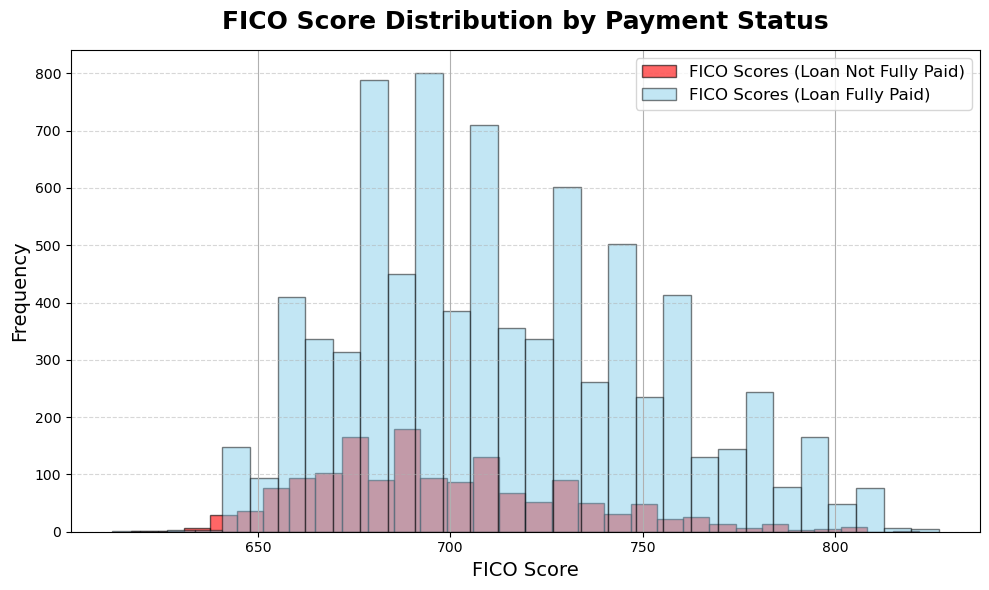

In [44]:
plt.figure(figsize=(10, 6)) 
df[df['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6,label='FICO Scores (Loan Not Fully Paid)',color='red',ec='black')
df[df['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.5,label='FICO Scores (Loan Fully Paid)',color='skyblue',ec='black')

plt.title('FICO Score Distribution by Payment Status', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('FICO Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Key Observations and Possible Interpretations: FICO Scores and Loan Repayment

## **Key Observations**

### 1. **Higher FICO Scores and Fully Paid Loans**
- Individuals with **FICO scores above 700** are more likely to have their loans **fully paid**.

### 2. **Lower FICO Scores and Loans Not Fully Paid**
- A significant portion of loans **not fully paid** have **FICO scores below 650**.

### 3. **Overlap in FICO Scores**
- There is **some overlap** between the two groups, suggesting that FICO score alone is not the **sole determinant** of loan repayment.

---

## **Possible Interpretations**

### 1. **FICO Scores and Creditworthiness**
- Lenders might use FICO scores as a key factor in assessing an individual's **creditworthiness**.

### 2. **Impact on Loan Terms**
- Individuals with **lower FICO scores** may face:
  - **Higher interest rates**.
  - **Stricter loan terms**.



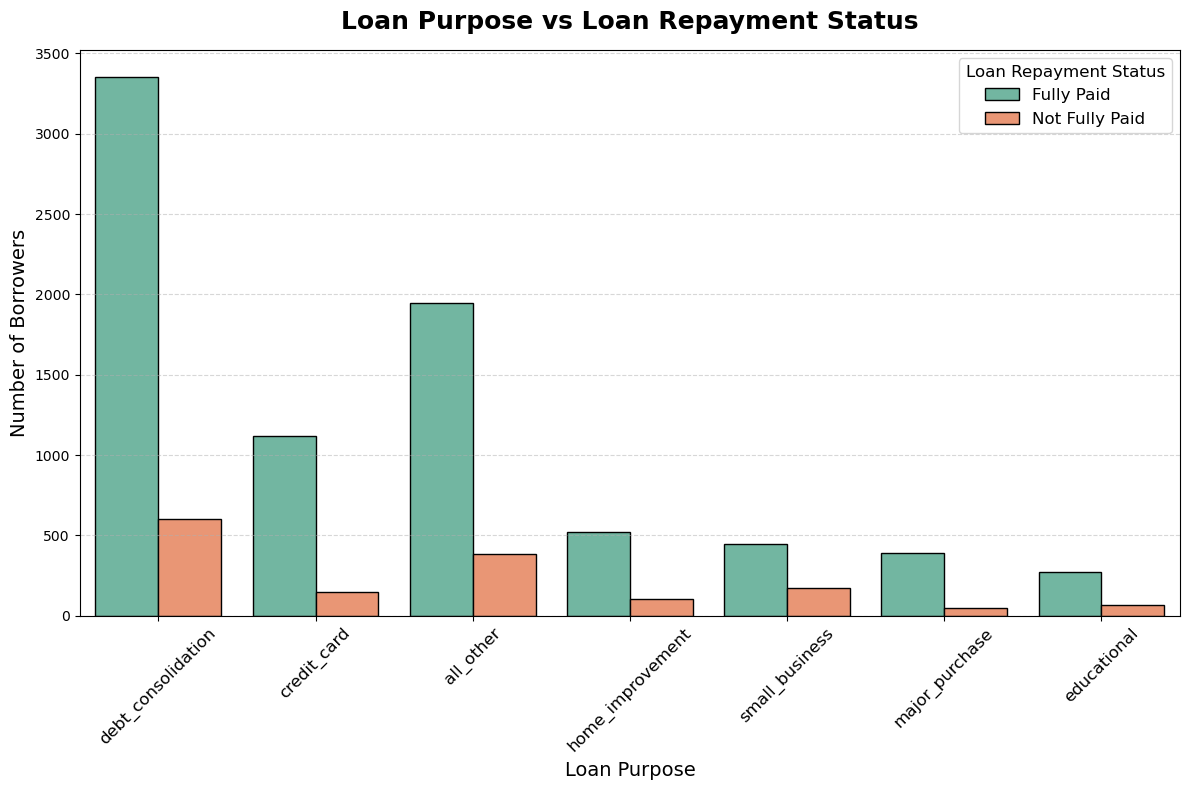

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['purpose'],hue=df['not.fully.paid'],palette='Set2',edgecolor='black')

plt.title('Loan Purpose vs Loan Repayment Status', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Number of Borrowers', fontsize=14)

plt.legend(
    title='Loan Repayment Status',
    labels=['Fully Paid','Not Fully Paid'],
    fontsize=12,
    title_fontsize=12 )

plt.xticks(rotation=45,fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

# Key Observations: Loan Types and Repayment Patterns

## **1. Debt Consolidation Loans**
- **Highest number** of both fully paid and not fully paid borrowers.
- Suggests that debt consolidation is a **common reason** for taking out loans.
- However, it also has a **higher rate of default**.

---

## **2. Credit Card Loans**
- Significant number of **fully paid borrowers** but also a considerable number of **not fully paid borrowers**.
- Indicates that credit card loans are often used for **smaller expenses**, but improper management can lead to **debt accumulation**.

---

## **3. Home Improvement Loans**
- Relatively **high proportion of fully paid borrowers** compared to not fully paid borrowers.
- Suggests that home improvement loans are used for **long-term investments** (e.g., increasing property value), which may make repayment more likely.

---

## **4. Small Business and Educational Loans**
- Lower proportion of fully paid borrowers compared to not fully paid borrowers.
- Reflects the **higher risk** associated with these loan types:
  - Small businesses may face **operational challenges**.
  - Education expenses are often **substantial**, making repayment difficult.

---

## **Conclusion**
- Different loan types exhibit distinct repayment patterns, highlighting the varying levels of **risk and repayment likelihood** associated with each category.


**Handling Catg Variables**

In [61]:
categ = ['purpose']
df= pd.get_dummies(df,columns=categ,drop_first=True)

df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [63]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

**Scaling Features**

In [66]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

X.shape, y.shape

((9578, 18), (9578,))

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6417, 18), (3161, 18), (6417,), (3161,))

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred_dt = model.predict(X_test)

print('Accuracy of Model: ' , accuracy_score(y_test,y_pred_dt))
print('Classification Report :\n', classification_report(y_test,y_pred_dt))


Accuracy of Model:  0.7428029104713698
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2650
           1       0.21      0.21      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161



# Detailed Explanation of Model Performance

---

## **Dataset Overview**:
- **Features (`X`)**: Includes 18 predictors like `credit.policy`, `int.rate`, `fico`, and various `purpose_*` variables.
- **Target (`y`)**: `not.fully.paid` (binary: 0 = fully paid, 1 = not fully paid).
- **Train-Test Split**: 
  - 33% test size, with a random seed of 42 for reproducibility.
  - Training set: 67% of data.
  - Test set: 33% of data.

---

## **Model**:
- used a **Decision Tree Classifier** for binary classification.

---

## **Performance Metrics**:

### **1. Accuracy**:
- **74.28% accuracy**: 
  - Indicates that the model correctly predicted the target for 74.28% of test samples.
  - While accuracy seems good, it is not always a reliable metric for imbalanced datasets.

### **2. Precision, Recall, and F1-Score**:
These metrics provide a more nuanced view of the model's performance for each class.

#### **Class 0 (`fully paid`)**:
- **Precision**: 0.85  
  - 85% of predicted `fully paid` loans are actually correct.
- **Recall**: 0.85  
  - 85% of actual `fully paid` loans are correctly identified by the model.
- **F1-Score**: 0.85  
  - Indicates a good balance between precision and recall.

#### **Class 1 (`not fully paid`)**:
- **Precision**: 0.21  
  - Only 21% of loans predicted as `not fully paid` are correct.
- **Recall**: 0.21  
  - Only 21% of actual `not fully paid` loans are identified by the model.
- **F1-Score**: 0.21  
  - Poor balance between precision and recall for this class.

### **3. Macro Average**:
- Averages metrics equally across classes:
  - **Precision**: 0.53  
  - **Recall**: 0.53  
  - **F1-Score**: 0.53  
  - Indicates poor performance for minority class (`not fully paid`).

### **4. Weighted Average**:
- Averages metrics weighted by class support:
  - **Precision**: 0.74  
  - **Recall**: 0.74  
  - **F1-Score**: 0.74  
  - Dominated by the majority class (`fully paid`).

---

## **Key Insights**:

### **1. Imbalanced Dataset**:
- Class 0 (`fully paid`) has 2650 samples, while Class 1 (`not fully paid`) has only 511 samples.
- The imbalance skews metrics like accuracy and weighted averages toward the majority class.

### **2. Poor Minority Class Prediction**:
- Low precision, recall, and F1-score for `not fully paid` loans (Class 1) show that the model struggles with identifying minority cases.

### **3. Potential Issues**:
- Decision trees can overfit, especially without proper hyperparameter tuning.
- The imbalance in the target variable negatively impacts performance for the minority class.

---


[[2240  410]
 [ 403  108]]


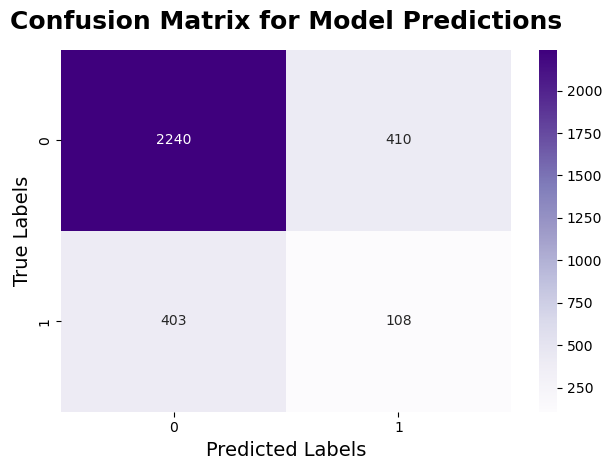

In [103]:
confusion = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(confusion,annot=True,cmap='Purples',fmt='.4g')
print(confusion)

plt.title('Confusion Matrix for Model Predictions', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)

plt.tight_layout()
plt.show()


---

## **Structure of the Confusion Matrix**

| **Actual \ Predicted** | **Predicted 0** (Fully Paid) | **Predicted 1** (Not Fully Paid) |
|-------------------------|------------------------------|-----------------------------------|
| **Actual 0 (Fully Paid)** | 2240                         | 410                               |
| **Actual 1 (Not Fully Paid)** | 403                          | 108                               |

---

## **Terminology**
1. **True Negatives (TN)**: 2240  
   - Model correctly predicted loans as **`Fully Paid`** when they were actually fully paid.

2. **False Positives (FP)**: 410  
   - Model incorrectly predicted loans as **`Not Fully Paid`** when they were actually fully paid.

3. **False Negatives (FN)**: 403  
   - Model incorrectly predicted loans as **`Fully Paid`** when they were actually not fully paid.

4. **True Positives (TP)**: 108  
   - Model correctly predicted loans as **`Not Fully Paid`** when they were actually not fully paid.


---

## **Key Observations**
1. **Strong Performance on Class 0 (`Fully Paid`)**:
   - The model performs well in predicting `Fully Paid` loans, as shown by:
     - High True Negatives (2240)
     - High Specificity (84.53%).

2. **Poor Performance on Class 1 (`Not Fully Paid`)**:
   - Precision (20.85%) and Recall (21.13%) for `Not Fully Paid` are very low.
   - The model struggles to correctly identify minority class samples.

3. **Class Imbalance Issue**:
   - The dataset is imbalanced, with:
     - 2650 samples for `Fully Paid` (Class 0).
     - 511 samples for `Not Fully Paid` (Class 1).
   - This skews the model's performance towards the majority class.

---


**Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)

print('Accuracy of model:',accuracy_score(y_test,y_pred_rf))
print('Classification Report :\n', classification_report(y_test,y_pred_))

Accuracy of model: 0.8380259411578614
Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.48      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.48      3161
weighted avg       0.78      0.84      0.77      3161



# Random Forest Classifier: Performance Analysis

## **1. Accuracy**
- **Accuracy of Model**: `0.838` (~83.8%).
  - Indicates that the model correctly predicted **83.8%** of all test samples.

---

## **2. Classification Report Metrics**

### **Class `0` (Fully Paid Loans)**
- **Precision**: `0.84` → 84% of predicted "0" labels are correct.
- **Recall**: `1.00` → The model identified all actual "0" labels.
- **F1-Score**: `0.91` → Harmonic mean of precision and recall for class `0`.

### **Class `1` (Not Fully Paid Loans)**
- **Precision**: `0.48` → 48% of predicted "1" labels are correct.
- **Recall**: `0.02` → The model captured only 2% of actual "1" labels.
- **F1-Score**: `0.04` → Very low harmonic mean due to poor recall.

---

## **3. Macro vs. Weighted Averages**
- **Macro Avg**:
  - **Precision**: `0.66`, **Recall**: `0.51`, **F1-Score**: `0.48`.
  - Takes an **unweighted average** across classes, highlighting performance imbalance.
- **Weighted Avg**:
  - **Precision**: `0.78`, **Recall**: `0.84`, **F1-Score**: `0.77`.
  - Weights scores by class support, favoring the dominant class (`0`).

---

## **4. Observations**
- **High Accuracy but Imbalanced Performance**:
  - The model is biased toward the majority class (`0`), leading to poor performance for the minority class (`1`).
- **Challenges with Imbalanced Data**:
  - The minority class (`1`) is underrepresented, as seen in the **support** values:
    - Class `0`: `2650` samples.
    - Class `1`: `511` samples.




[[2638   12]
 [ 500   11]]


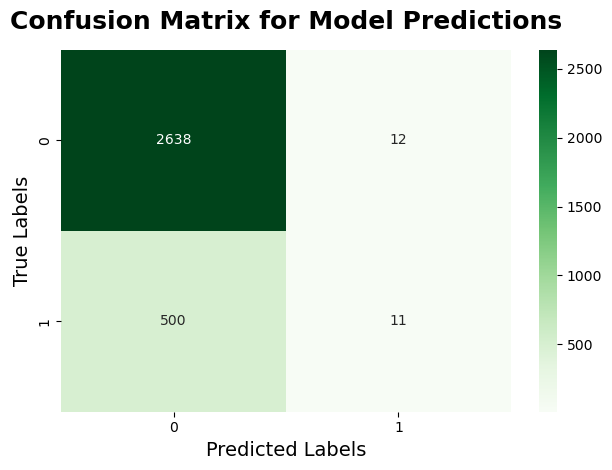

In [109]:
confusion = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confusion,annot=True,cmap='Greens',fmt='.4g')
print(confusion)

plt.title('Confusion Matrix for Model Predictions', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)

plt.tight_layout()
plt.show()

## **Structure of the Confusion Matrix**

| **Actual \ Predicted** | **Predicted 0** (Fully Paid) | **Predicted 1** (Not Fully Paid) |
|-------------------------|------------------------------|-----------------------------------|
| **Actual 0 (Fully Paid)** | 2638                         | 12                                |
| **Actual 1 (Not Fully Paid)** | 500                          | 11                                |

---

## **Terminology**
1. **True Negatives (TN)**: 2638  
   - Model correctly predicted loans as **`Fully Paid`** when they were actually fully paid.

2. **False Positives (FP)**: 12  
   - Model incorrectly predicted loans as **`Not Fully Paid`** when they were actually fully paid.

3. **False Negatives (FN)**: 500  
   - Model incorrectly predicted loans as **`Fully Paid`** when they were actually not fully paid.

4. **True Positives (TP)**: 11  
   - Model correctly predicted loans as **`Not Fully Paid`** when they were actually not fully paid.

---

## **Key Observations**
1. **Strong Performance on Class 0 (`Fully Paid`)**:
   - The model performs well in predicting `Fully Paid` loans, as shown by:
     - High True Negatives (2638).
     - Low False Positives (12).
     - High specificity for `Fully Paid` loans.

2. **Poor Performance on Class 1 (`Not Fully Paid`)**:
   - The model struggles significantly to identify loans that are **`Not Fully Paid`**:
     - Very low True Positives (11).
     - High False Negatives (500).
     - Precision and recall for the minority class are very low.

3. **Class Imbalance Issue**:
   - The dataset is imbalanced, with:
     - **2650** samples for `Fully Paid` (Class 0).
     - **511** samples for `Not Fully Paid` (Class 1).
   - This imbalance causes the model to favor predicting the majority class (`Fully Paid`), leading to poor performance on the minority class (`Not Fully Paid`).

---


# Model Evaluation

In [115]:
models = pd.DataFrame({
    'Model Used': ['Decision Tree','Random Forest'],
    'Accuracy Score': [accuracy_score(y_test,y_pred_dt),
                       accuracy_score(y_test,y_pred_rf)
                      ]
})

models.sort_values(by = 'Accuracy Score',ascending=False)

,Model Used,Accuracy Score
1,Random Forest,0.838026
0,Decision Tree,0.742803


## **Model Performance Comparison**

### **1. Random Forest Model**
- **Accuracy Score**: `0.838` (~83.8%).
  - The Random Forest model has a relatively high accuracy, suggesting that it does a good job of predicting loan repayment status overall.
  - It is better at identifying the majority class (`Fully Paid`), but struggles with the minority class (`Not Fully Paid`).

### **2. Decision Tree Model**
- **Accuracy Score**: `0.743` (~74.3%).
  - The Decision Tree model has a lower accuracy compared to the Random Forest model.
  - While it still performs fairly well on the overall dataset, it likely struggles more with handling the imbalance between the two classes.
  
---

## **Key Observations**
1. **Random Forest vs Decision Tree**:
   - **Random Forest** outperforms **Decision Tree** by approximately `9.8%` in terms of accuracy.
   - Random Forest, being an ensemble method, leverages multiple decision trees to reduce overfitting and provide more stable predictions compared to a single decision tree.
   
2. **Class Imbalance Consideration**:
   - Both models may be biased toward predicting the majority class (`Fully Paid`) due to class imbalance in the dataset.
   - Despite the higher accuracy of Random Forest, both models might benefit from techniques like oversampling, undersampling, or class weighting to improve performance for the minority class (`Not Fully Paid`).

---
